In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [7]:
import extract_and_transform as et
X_train,X_test,y_train,y_test,real_df,X,y = et.training_data()

In [8]:
model=Sequential()
model.add(Dense(128,input_dim=8,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [9]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 4ms/step - loss: 1510.5015 - mae: 34.8642 - val_loss: 1403.5168 - val_mae: 34.2383
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 1323.0031 - mae: 32.2175 - val_loss: 1166.9127 - val_mae: 30.7608
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 1018.9863 - mae: 27.5043 - val_loss: 801.7921 - val_mae: 24.6818
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 622.0171 - mae: 20.3207 - val_loss: 415.4560 - val_mae: 16.4897
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 321.5097 - mae: 14.1177 - val_loss: 211.0402 - val_mae: 11.9038
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 234.3274 - mae: 12.2795 - val_loss: 173.6974 - val_mae: 11.0367
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 213.8051 - mae: 11.7650 - val_loss: 168.8794 - val_mae: 10.9868
Epoch 8/100
21/21 [=================

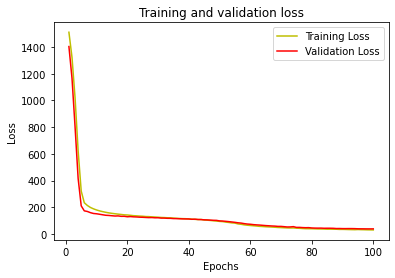

In [10]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
history.history

{'loss': [1510.50146484375,
  1323.0030517578125,
  1018.986328125,
  622.01708984375,
  321.5097351074219,
  234.3274383544922,
  213.80508422851562,
  198.92919921875,
  188.54307556152344,
  180.04745483398438,
  173.22079467773438,
  167.5361785888672,
  162.6193084716797,
  158.34872436523438,
  154.7964630126953,
  151.87521362304688,
  149.0369415283203,
  146.44699096679688,
  143.8160400390625,
  142.71934509277344,
  140.1237335205078,
  137.52932739257812,
  136.21250915527344,
  134.506591796875,
  133.25,
  131.06802368164062,
  130.48606872558594,
  128.46478271484375,
  127.62368774414062,
  126.0465316772461,
  124.17221069335938,
  123.32444763183594,
  121.91867065429688,
  121.14842224121094,
  119.29777526855469,
  117.69317626953125,
  116.54364776611328,
  115.38218688964844,
  114.85941314697266,
  112.72370910644531,
  111.25089263916016,
  109.94920349121094,
  108.49856567382812,
  109.18524932861328,
  105.03273010253906,
  103.7713394165039,
  101.7217025756

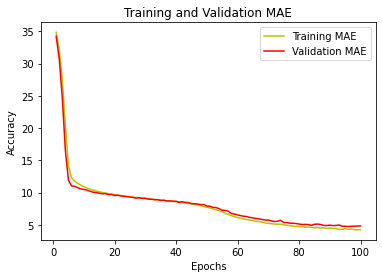

In [14]:
acc = history.history['mae']
val_acc=history.history['val_mae']
plt.plot(epochs,acc,'y',label='Training MAE')
plt.plot(epochs,val_acc,'r',label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
predictions=model.predict(X_train[:5])

In [16]:
print("Predicted values are: ",predictions)
print("Real values: ", y_train[:5])

Predicted values are:  [[33.252266]
 [54.135475]
 [23.517939]
 [37.16558 ]
 [15.973469]]
Real values:  [27.68 62.05 23.8  33.4   7.4 ]


In [26]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 1ms/step - loss: 39.3379 - mae: 4.9769


[39.337886810302734, 4.976864814758301]

In [20]:
mse_neural, mae_neural

(39.337886810302734, 4.976864814758301)

In [21]:
print(f'Mean squared error from neural net: {mse_neural}')
print(f'Mean absolute error from neural net: ',mae_neural)

Mean squared error from neural net: 39.337886810302734
Mean absolute error from neural net:  4.976864814758301


In [32]:
predict=model.predict(X_test)


for x in range(len(y_test)):
    
    print(f"Actual: {y_test[x]}, Predictions: {predict[x]},Error: {(y_test[x]-predict[x])}")



Actual: 52.91, Predictions: [40.34366],Error: [12.566341]
Actual: 55.9, Predictions: [44.393917],Error: [11.506084]
Actual: 74.5, Predictions: [65.0288],Error: [9.471199]
Actual: 35.3, Predictions: [41.220497],Error: [-5.920498]
Actual: 10.54, Predictions: [13.944755],Error: [-3.4047546]
Actual: 44.28, Predictions: [45.803802],Error: [-1.5238037]
Actual: 23.69, Predictions: [28.599283],Error: [-4.9092827]
Actual: 45.37, Predictions: [55.428474],Error: [-10.0584755]
Actual: 37.4, Predictions: [31.755415],Error: [5.6445866]
Actual: 48.85, Predictions: [40.780716],Error: [8.069283]
Actual: 25.1, Predictions: [33.08024],Error: [-7.980238]
Actual: 10.73, Predictions: [7.7450905],Error: [2.984909]
Actual: 40.2, Predictions: [44.833706],Error: [-4.633705]
Actual: 49.8, Predictions: [38.81347],Error: [10.98653]
Actual: 33.01, Predictions: [23.05391],Error: [9.956089]
Actual: 21.92, Predictions: [27.293472],Error: [-5.373472]
Actual: 40.06, Predictions: [33.94921],Error: [6.1107903]
Actual: 19.